# Topic Modeling Analysis for a Set of Publications in Just 3 Steps
This Notebook shows how it's possible to extract 'concepts' from publications and then use these terms in order to perform more advanced topic analyses tasks. 

## 1. Load libraries and log in

In [3]:
username = ""  #@param {type: "string"}
password = ""  #@param {type: "string"}
endpoint = "https://app.dimensions.ai"  #@param {type: "string"}

#
!pip install dimcli plotly_express -U --quiet 
!mkdir extraction2
#
# API library
import dimcli
from dimcli.shortcuts import *
dimcli.login(username, password, endpoint)
dsl = dimcli.Dsl()
#
# other libraries
import plotly_express as px
import pandas as pd
from pandas.io.json import json_normalize
import time
import json
from tqdm import tqdm_notebook as pbar


mkdir: extraction2: File exists
DimCli v0.6.1 - Succesfully connected to <https://app.dimensions.ai> (method: manual login)


## 2. Choose a Fraunhofer Research Organization

Dimensions uses GRID to identify research-related organizations, eg https://grid.ac/institutes/grid.89170.37 

In [8]:
#@markdown Please choose a specific member of the Fraunhofer Society,  then run this cell.

GRIDID = "grid.461634.2"  #@param ['Fraunhofer Institute for Laser Technology == grid.461628.f', 'Fraunhofer Institute for Molecular Biology and Applied Ecology == grid.418010.c', 'Fraunhofer Institute for Production Technology == grid.461634.2', 'Fraunhofer Research Institution for Casting, Composite and Processing Technology == grid.506241.4', 'Fraunhofer Institute for Telecommunications, Heinrich Hertz Institute == grid.435231.2', 'Fraunhofer Institute for Open Communication Systems == grid.469837.7', 'Fraunhofer Institute for Production Systems and Design Technology == grid.469819.b', 'Fraunhofer Institute for Reliability and Microintegration == grid.469839.9', 'Fraunhofer Institute for Wood Research Wilhelm-Klauditz-Institut == grid.469829.8', 'Fraunhofer Institute for Surface Engineering and Thin Films == grid.462227.7', 'Fraunhofer Institute for Digital Medicine == grid.428590.2', 'Fraunhofer Institute for Manufacturing Technology and Advanced Materials == grid.461617.3', 'Fraunhofer Institute for Wind Energy Systems == grid.8440.8', 'Fraunhofer Institute for Electronic Nano Systems == grid.469847.0', 'Fraunhofer Institute for Machine Tools and Forming Technology == grid.461651.1', 'Fraunhofer Institute for Structural Durability and System Reliability == grid.434481.e', 'Fraunhofer Institute for Computer Graphics Research == grid.461618.c', 'Fraunhofer Institute for Secure Information Technology == grid.469848.f', 'Fraunhofer Institute for Material Flow and Logistics == grid.469827.6', 'Fraunhofer Institute for Software and Systems Engineering == grid.469821.0', 'Fraunhofer Institute for Ceramic Technologies and Systems == grid.461622.5', 'Fraunhofer Institute for Organic Electronics, Electron Beam and Plasma Technology == grid.469851.7', 'Fraunhofer Institute for Photonic Microsystems == grid.469853.5', 'Fraunhofer Institute for Transportation and Infrastructure Systems == grid.469826.7', 'Fraunhofer Institute for Material and Beam Technology == grid.461641.0', 'Fraunhofer Institute for Microelectronic Circuits and Systems == grid.469854.2', 'Fraunhofer Institute for Integrated Circuits == grid.469850.6', 'Fraunhofer Institute for Integrated Circuits == grid.469823.2', 'Fraunhofer Institute for Integrated Systems and Device Technology == grid.469855.3', 'Fraunhofer Institute of Optronics, System Technologies and Image Exploitation == grid.466706.5', 'Fraunhofer Institute for Technological Trend Analysis == grid.469856.0', 'Fraunhofer Institute for Applied Solid State Physics == grid.424642.2', 'Fraunhofer Institute for High-Speed Dynamics, Ernst-Mach-Institut == grid.461627.0', 'Fraunhofer Institute for Physical Measurement Techniques == grid.461631.7', 'Fraunhofer Institute for Solar Energy Systems == grid.434479.9', 'Fraunhofer Institute for Mechanics of Materials == grid.461645.4', 'Fraunhofer Institute for Process Engineering and Packaging == grid.466709.a', 'Fraunhofer Institute for Microstructure of Materials and Systems == grid.469857.1', 'Fraunhofer Research Institution for Additive Manufacturing Technologies == grid.506239.b', 'Fraunhofer Institute for Toxicology and Experimental Medicine == grid.418009.4', 'Fraunhofer Institute for Ceramic Technologies and Systems == grid.461622.5', 'Fraunhofer Institute for Building Physics == grid.469871.5', 'Fraunhofer Institute for Digital Media Technology  == grid.469861.4', 'Fraunhofer Institute for Silicon Technology == grid.469817.5', 'Fraunhofer Institute for Applied Optics and Precision Engineering == grid.418007.a', 'Fraunhofer Institute for Experimental Software Engineering == grid.469863.6', 'Fraunhofer Institute for Industrial Mathematics == grid.461635.3', 'Fraunhofer Institute of Optronics, System Technologies and Image Exploitation == grid.466706.5', 'Fraunhofer Institute for Systems and Innovation Research == grid.459551.9', 'Fraunhofer Institute for Energy Economics and Energy System Technology == grid.506250.4', 'Fraunhofer Center for International Management and Knowledge Economy == grid.462230.1', 'Fraunhofer Institute for Cell Therapy and Immunology == grid.418008.5', 'Fraunhofer Research Institution for Marine Biotechnology and Cell Technology == grid.469834.4', 'Fraunhofer Institute for Factory Operation and Automation == grid.469818.a', 'Fraunhofer Institute for Microengineering and Microsystems == grid.28894.3f', 'Fraunhofer Institute for Embedded Systems and Communication Technologies == grid.469865.0', 'Fraunhofer Research Institution for Microsystems and Solid State Technologies == grid.469866.3', 'Fraunhofer Institute for Applied and Integrated Security == grid.469867.2', 'Fraunhofer Institute for Environmental, Safety, and Energy Technology == grid.424428.c', 'Fraunhofer Institute for Mechatronic Systems Design == grid.469868.d', 'Fraunhofer Institute for Chemical Technology == grid.461616.2', 'Fraunhofer Institute for Applied Polymer Research == grid.461615.1', 'Fraunhofer Research Institution for Large Structures in Production Engineering == grid.506226.5', 'Fraunhofer Institute for Nondestructive Testing == grid.469830.0', 'Fraunhofer Institute for Algorithms and Scientific Computing == grid.418688.b', 'Fraunhofer Institute for Applied Information Technology == grid.469870.4', 'Fraunhofer Institute for Intelligent Analysis and Information Systems == grid.469822.3', 'Fraunhofer Institute for Molecular Biology and Applied Ecology == grid.418010.c', 'Fraunhofer Institute for Industrial Engineering == grid.434477.7', 'Fraunhofer Institute for Building Physics == grid.469871.5', 'Fraunhofer Institute for Interfacial Engineering and Biotechnology == grid.469831.1', 'Fraunhofer Institute for Manufacturing Engineering and Automation == grid.469833.3', 'Fraunhofer Information Center for Planning and Building == grid.469872.6', 'Fraunhofer Institute for Biomedical Engineering == grid.452493.d', 'Fraunhofer Institute for High Frequency Physics and Radar Techniques == grid.461619.d', 'Fraunhofer Institute for Communication, Information Processing and Ergonomics == grid.469836.6', 'Fraunhofer Institute for Silicate Research == grid.424644.4']
    
#@markdown The start/end year of publications used to extract patents
YEAR_START = 2000 #@param {type: "slider", min: 1950, max: 2020}
YEAR_END = 2016 #@param {type: "slider", min: 1950, max: 2020}

if YEAR_END < YEAR_START:
  YEAR_END = YEAR_START

try:
    if "==" in GRIDID: GRIDID = GRIDID.split("==")[1].strip() 
    print("Selection: ", GRIDID)
except:
    print("Please select an organization")
    raise

#
# util for saving results
#
def save_as_csv(df, save_name_without_extension):
    "usage: `save_as_csv(dataframe, 'filename')`"
    folder = "extraction2/"
    df.to_csv(f"{folder}{save_name_without_extension}.csv", index=False)
    print("===\nSaved: ", f"{folder}{save_name_without_extension}.csv")
   
    
#
# gen link to Dimensions
#

def dimensions_url(grids):
    root = "https://app.dimensions.ai/discover/publication?or_facet_research_org="
    return root + "&or_facet_research_org=".join([x for x in grids])

from IPython.core.display import display, HTML
display(HTML('---<br /><a href="{}">Open {} in Dimensions &#x29c9;</a>'.format(dimensions_url([GRIDID]), GRIDID)))


#@markdown ---

Selection:  grid.461634.2


## 3. Extracting most relevant concepts from publications

We are going to retrieve all publications based on the GRID and years-range previously selected, and then extract all `concepts` related to each of these publications. 
It is important to remember that the list of concepts the API returns for each publication is ordered by most-relevant first, e.g. 
```
{'concepts': ['intermediates', 'metabolic pathways', 'pathway', 'enzyme molecules','molecules', 'active center', etc..]}
```

In other words, **relevancy scores are implicit**. So, in order to combine concepts from multiple publications, we will assign them a score automatically based on the position a concept has in the list (=the first concept gets the highest number). 

We also add two parameters that can modified to improve the extraction
* the number of concepts to extract per publications 
* a list of words to exclude from the concepts 


===
Retrieving Publications.. 
412 / 412
===
Extracting Concepts.. 
===
Found (total): 3025
===
Found (unique): 1655


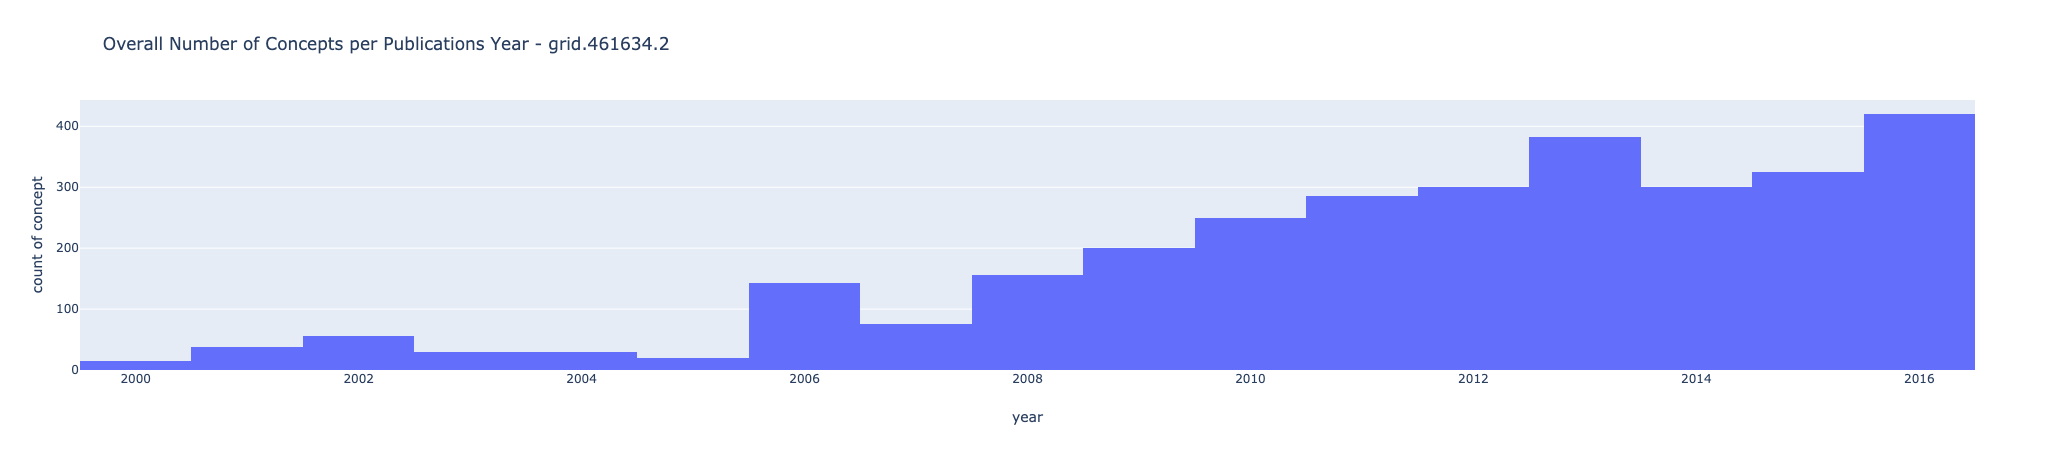

In [39]:
#@markdown Please update the parameters as needed

#@markdown Concept names to ignore - comma separated
ignore = "process, design"  #@param {type: "string"}
#@markdown Max number of concepts for each publication
max_concepts = 10 #@param {type: "slider", min: 1, max: 50}

#@markdown ---


query = f"""
search publications 
    where research_orgs.id = "{GRIDID}"
    and year in [{YEAR_START}:{YEAR_END}]
    return publications[id+concepts+year]
"""


def cleanup_terms(concepts):
    blacklist = ignore.split(",")
    o = []
    for x in concepts:
        if x.lower() not in blacklist and (not x.isupper()):
            o.append(x)
    return o
        
def concepts_extractor(dsl_results, cleanup=True, n=20):
    df = pd.DataFrame(columns=['concept', 'score', 'year', 'pubid'])
    for x in dsl_results:
        if 'concepts' in x:
            concepts = x['concepts'][:n]
            if cleanup:
                concepts = cleanup_terms(concepts)
            if concepts:
                llen = len(concepts)
                scores = list(range(1, llen+1))[::-1] # highest score first
                years = [x["year"]] * llen
                pubids = [x["id"]] * llen
                z = list(zip(concepts, scores, years, pubids))
                d = [{'concept': a, 'score': b, 'year': c, 'pubid': d} for a,b,c,d in z]
                df = df.append(d, sort=True)
    return df


print("===\nRetrieving Publications.. ")
data = dsl.query_iterative(query)
print("===\nExtracting Concepts.. ")
df = concepts_extractor(data.publications, True, max_concepts)
print("===\nFound (total):", len(df))
print("===\nFound (unique):", len(df.drop_duplicates('concept')))

#
# summary chart
print("===\nCreating summary chart..")
px.histogram(df, x="year", y="concept", title=f"Overall Number of Concepts per Publications Year - {GRIDID}")

### Top concepts: a first look

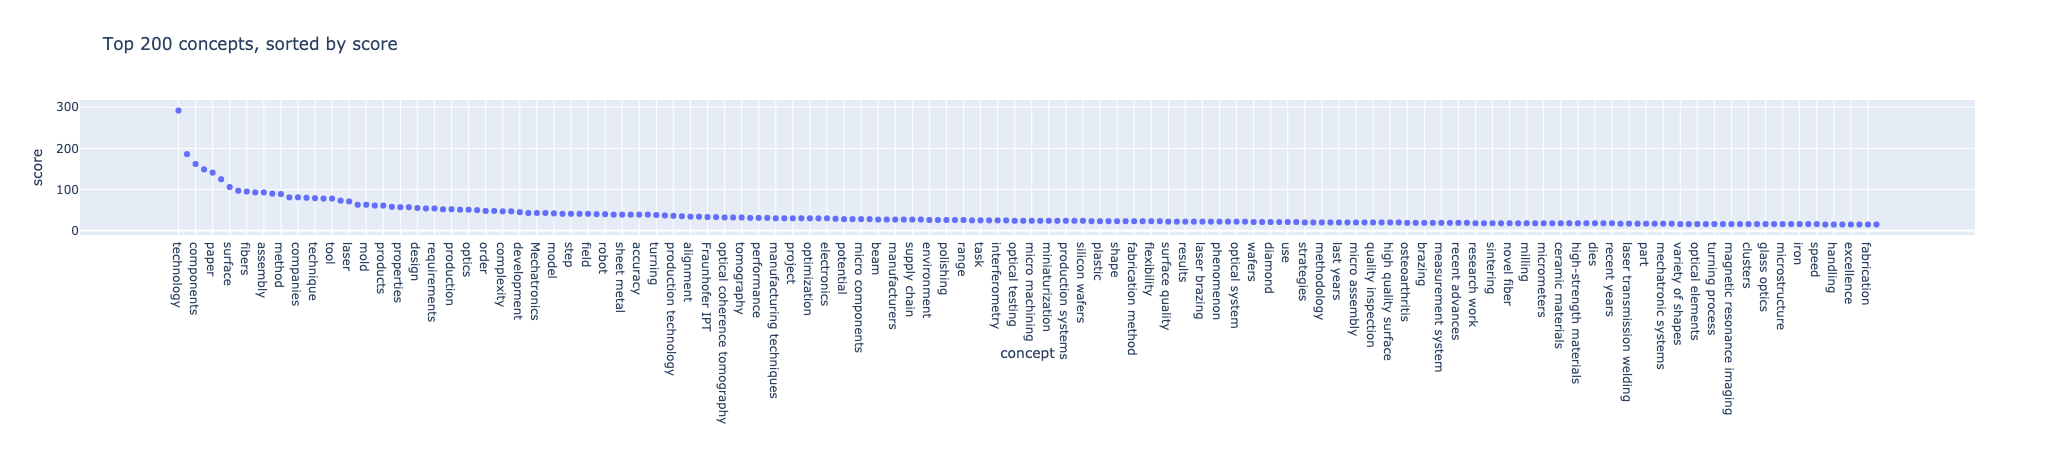

In [52]:
#@markdown Limit concepts displayed
THRESHOLD = 200 #@param {type: "slider", min: 20, max: 500}
#
df_by_concept = df.groupby('concept', as_index=False).sum()
df_by_concept = df_by_concept.sort_values(by="score",  ascending=False).reset_index(drop=True)
px.scatter(df_by_concept.head(THRESHOLD), x="concept", y="score", 
           title=f"Top {THRESHOLD} concepts, sorted by score")

### Segmenting concepts by year

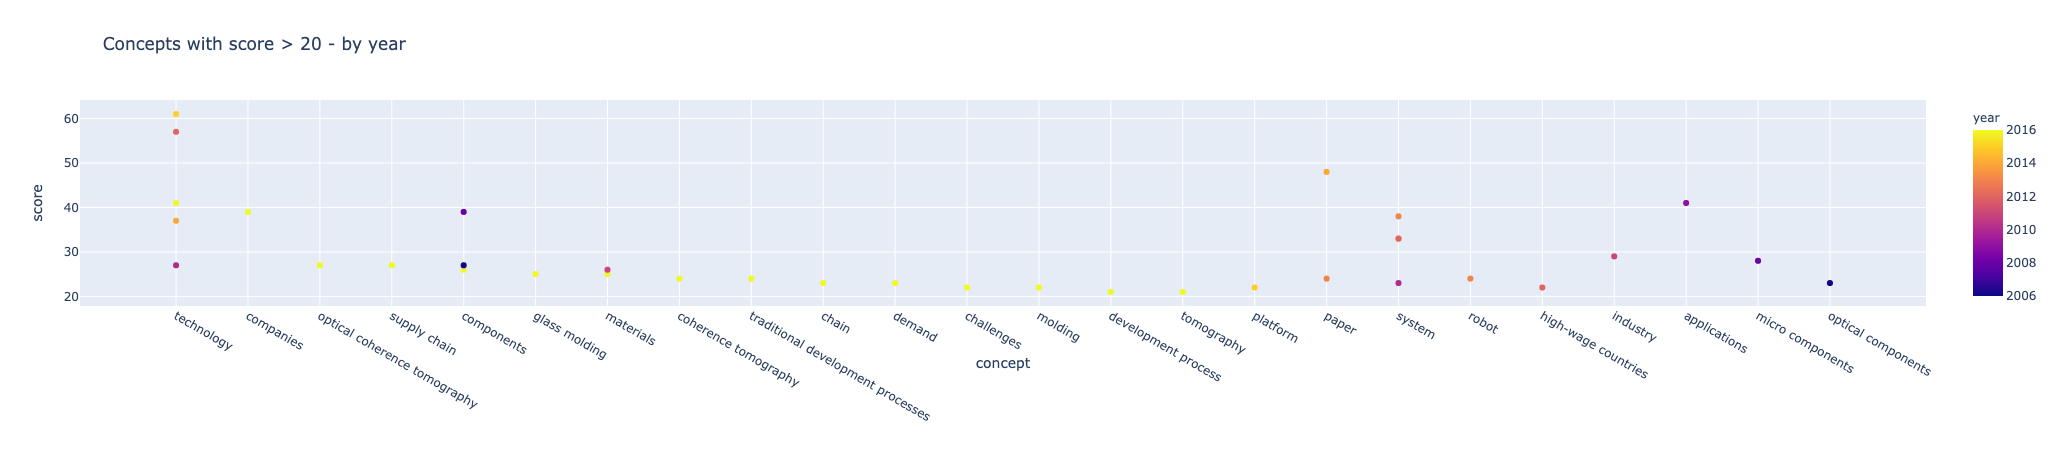

In [58]:
#@markdown Limit concepts score (min)
THRESHOLD = 20 #@param {type: "slider", min: 5, max: 500}
#
df_by_year = df.groupby(['year', 'concept'], as_index=False).sum()
df_by_year = df_by_year.sort_values(by=["year", "score"],  ascending=False)
df_by_year = df_by_year.reset_index(drop=True)
px.scatter(df_by_year.query(f"score>{THRESHOLD}"), x="concept", y="score", 
           color="year", title=f"Concepts with score > {THRESHOLD} - by year")

---
## Want to learn more?

Check out the [Dimensions API Lab](https://digital-science.github.io/dimensions-api-lab/) website, which contains many tutorials and reusable Jupyter notebooks for scholarly data analytics. 